<center>
<a href="http://www.enac.fr/" ><img src="https://www.enac.fr/themes/custom/enac/assets/images/logo_1.png" style="float:left; max-width: 120px; display: inline" alt="ENAC"/></a> 
</center>

<font size="14">Visualisations 2D et 3D en </font><a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a> <font size="14"> avec : </font> <a href="http://matplotlib.org/"><img src="http://matplotlib.org/_static/logo2.svg" style="max-width: 350px; display: inline" alt="matplotlib"/>  
<a href="https://github.com/xoolive/traffic/"><img src="./traffic_full_logo.png" style="max-width: 350px; display: inline" alt="Traffic"/></a> <a href="https://pypi.org/project/Cartopy/"><img src="https://foundations.projectpythia.org/_images/cartopy_logo.png" style="max-width: 300px; display: inline" alt="Cartopy"/></a>


-------

**[Science des Données](https://e-campus.enac.fr/moodle/course/view.php?id=5684), Laurent Lapasset**, *2024*

Votre notebook s'execute actuellement sur :

In [1]:
import socket
print(socket.gethostname())

mds6


<hr>

**<span style="color:red">Conseils préliminaires et pré-requis pour ce notebook</span>** :

Nous recommandons l'installation d'Ubuntu 20.04 LTS, système pour lequel tous les développements sont réalisés en premier par les GAFA, avant portage sur les autres OS.

Ce notebook fonctionne avec python 3.10 sous Windows et Linux (même si ce dernier est recommandé donc).
Il ne nécessite pas de ressources matérielles particulières.

**Avant** d'installer python et les librairies, il est recommandé de travailler dans votre environnement Anaconda spécifique. Pour cela vous devez créer cet environnement avec la commande `conda create --name testenv1` où `testenv1` sera votre nouvel environnement. On peut créer autant d'environnements que l'on souhaite dans la limite de l'espace disque disponible. Ensuite pour activer cet environnement `testenv1` et "rentrer" dedans utiliser la commande `source activate testenv1` et installer ce que vous souhaitez, ce que nous allons voir ci-dessous. Pour avoir la liste des environnements existants utilser la comande `conda env list`. Enfin, l'ensemble des options disponibles est accessibles avec `conda --help`. 

On suppose maintenant que vous avez créé et activé un environnement Conda.

Un certain nombre de librairies sont nécessaires pour le bon fonctionnement de ce notebook. Pour s'assurer d'une gestion cohérente et automatique des dépendances entre librairies, il est recommandé d'utiliser une des méthodes suivantes :

- via l'interface graphique d'anaconda : `anaconda-navigator`
- en ligne de commande : `conda install <librairie>`
- en ligne de commande : `conda install -c conda-forge <librairie>`
- en ligne de commande : `pip install <librairie>`

Remarques : 

- l'option `-c` indique le canal spécifique à partir duquel les packages peuvent être installés. `Conda` et `conda-forge` sont tous deux des gestionnaires de packages Python. `conda` est le gestionnaire de packages multiplateforme et `conda-forge` le canal de packages. Il y a quatre raisons principales d'utiliser le `conda-forge` canal au lieu du canal `defaults` maintenu par Anaconda:

    - Les packages sur `conda-forge` peuvent être plus à jour que ceux sur la chaîne `defaults`<br>
    - Certains packages sur la chaîne `conda-forge`  ne sont pas disponibles à partir de `defaults`<br>
    - Vous préférez utiliser une dépendance telle que `openblas` (de conda-forge) au lieu de `mkl` (de defaults).<br>
    - Si vous installez un package qui nécessite une bibliothèque compilée (par exemple, une extension C ou un wrapper autour d'une bibliothèque C), cela peut réduire le risque d'incompatibilités si vous installez tous les packages dans un environnement à partir d'un seul canal en raison de la compatibilité binaire de la bibliothèque C (mais cet avis peut être obsolète / changer dans le futur).<br>
<br>

- sur la dernière version d'Ubuntu 20.04 LTS c'est python 3 qui est installé par défaut. A partir de cette release il n'ai plus nécessaire d'utiliser pip3 à la place de pip.

<hr>

Ce notebook est une version simplifée de celui développé par J.R. Johansson. D'autres notebooks du même auteur sont accessibles [ici](http://jrjohansson.github.io). Cartopy et Traffic présentent de nombreux exemples, disponibles sur les sites respectifs.

Je remercie également Brendan Guillouet et Philippe Besse de l'INSA Toulouse pour leur [notebook](https://github.com/wikistat) dont cet atelier s'inspire. 

**Important** la commande ci-dessous provoque l'insertion des graphiques dans le notebook plutôt que l'ouverture de nouvelles fenêtres. 

In [2]:
%matplotlib inline

# Introduction
## Principe

Matplotlib est une librairie pour des graphes 2D et 3D, 
* facile à utiliser,
* intègrant des formats $\LaTeX$ (si LaTex est installé),
* contrôlant tous les éléments d'une figure, 
* supportant tous les formats png, pdf, eps..
Plus d'information sur la [page de Matplotlib](http://matplotlib.org/)

Le tracé de courbes scientifiques peut se faire à l'aide du module `matplotlib`. Matplotlib est un package complet; `pylab` et `pyplot` sont des modules de matplotlibqui sont installés avec `matplotlib`. Pylab associe les fonctions de `pyplot` (pour les tracés) avec les fonctionnalité du module `numpy` pour obtenir un environnement très proche de celui de `MATLAB`.

Pour démarrer avec Matplotlib dans un programme Python, inclure les objets du module `pylab`. C'est assez facile :

In [3]:
from pylab import * 

Ou importer le module `matplotlib.pyplot` avec l'identifiant `plt`. Plus correct pour éviter de charger tous les objets :

In [4]:
# import matplotlib
import matplotlib.pyplot as plt

In [5]:
import numpy as np

## MATLAB-like API

La façon la plus simple d'utiliser matplotlib est de le faire par l'API de type MATLAB compatible avec les fonctions graphique de MATLAB. 

In [6]:
from pylab import *

Exemple élémentaire d'utilisation de l'API.

In [7]:
x = np.linspace(0, 5, 10)
y = x ** 2

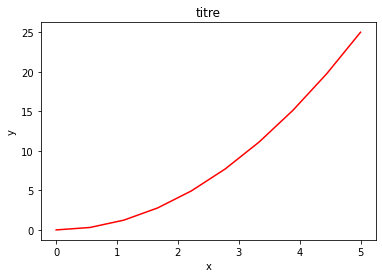

In [11]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('titre')
show()

La plupart des fonctions MATLAB sont incluses dans `pylab`.

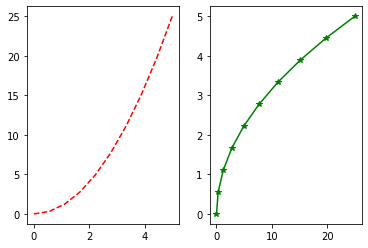

In [12]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');
show()

Cette API est limitée à des graphes rudimentaires. Les fonctionalités orientées objet de Matplotlib sont à privilégier pour des graphes plus élaborées. 

# Matplotlib orienté objet
## Syntaxe de base

L'idée principale de la programmation orientée objet est d'avoir des objets sur lesquels on peut appliquer des fonctions et des actions, et aucun état d'objet ou de programme ne doit être global (comme l'API de type MATLAB). L'avantage réel de cette approche devient apparent lorsque plusieurs figures sont créées ou lorsqu'une figure contient plusieurs sous-images.

Pour utiliser l'API orientée objet, nous commençons comme dans l'exemple précédent, mais au lieu de créer une nouvelle instance de figure globale, nous stockons une référence à l'instance de figure nouvellement créée dans la variable `fig`, et à partir de là, nous créons une nouvelle instance d'axe `axes` en utilisant la méthode `add_axes` dans l'instance de classe `Figure` notée `fig` :


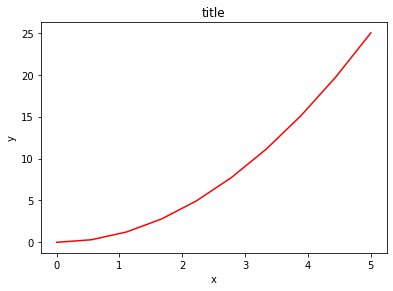

In [14]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');
show()

Bien qu'un peu plus de code soit impliqué, l'avantage est que nous avons maintenant le contrôle total de l'emplacement des axes du graphique, et nous pouvons facilement ajouter plus d'un axe à la figure :

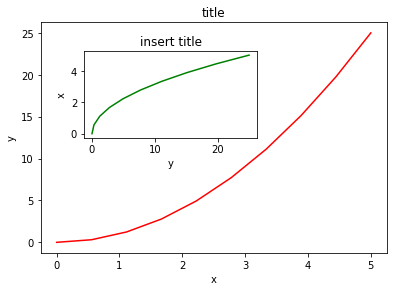

In [15]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');
show;

Si nous ne nous soucions pas d'être explicites quant à l'emplacement des axes de notre plot dans le canevas de la figure, nous pouvons utiliser l'un des nombreux gestionnaires de disposition des axes dans matplotlib. Mon préféré est le `subplots`, qui peut être utilisé comme ceci :


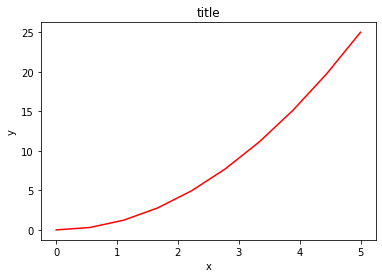

In [16]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');
show()

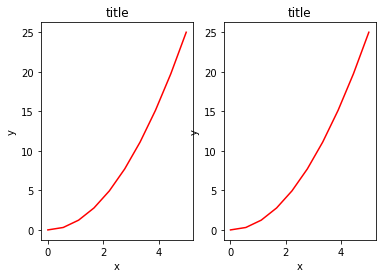

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
show()

C'était facile, mais ce n'est pas si joli avec des axes de figures et des étiquettes qui se chevauchent, n'est-ce pas ?

Nous pouvons régler ce problème en utilisant la méthode `fig.tight_layout`, qui ajuste automatiquement les positions des axes sur la toile de la figure de sorte qu'il n'y ait pas de chevauchement de contenu :

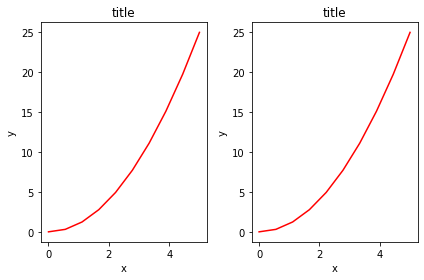

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()
show()

## Tailles et proportions

Matplotlib permet de spécifier le rapport d'aspect, le DPI et la taille de la figure lors de la création de l'objet`Figure`, en utilisant les arguments des mots-clés `figsize` et `dpi`. La `figsize` est un tuple de la largeur et de la hauteur de la figure en pouces, et `dpi` est le nombre de points par pouce (pixel par pouce). Pour créer une figure de 800x400 pixels, 100 points par pouce, nous pouvons faire : 

In [19]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Les mêmes arguments peuvent également être transmis aux responsables de la mise en page, comme la fonction `subplots` :

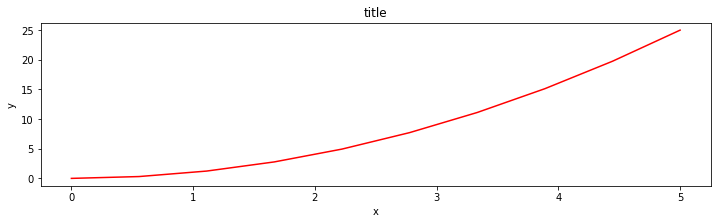

In [20]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');
show()

## Sauver les figures

Pour enregistrer une figure dans un fichier, nous pouvons utiliser la méthode `savefig` dans la classe `Figure` :

In [21]:
fig.savefig("filename.png")

Ici, nous pouvons également spécifier le DPI et choisir entre différents formats de sortie :

In [22]:
fig.savefig("filename.png", dpi=200)

#### Quels sont les formats disponibles et ceux qui doivent être utilisés pour une meilleure qualité ?

Matplotlib peut générer des sorties de haute qualité dans un certain nombre de formats, notamment PNG, JPG, EPS, SVG, PGF et PDF. Pour les articles scientifiques, je recommande d'utiliser le format PDF dans la mesure du possible. (Les documents LaTeX compilés avec `pdflatex` peuvent inclure des PDF en utilisant la commande `includegraphics`). Dans certains cas, PGF peut également être une bonne alternative.

## Légendes, libellés et titres

Maintenant que nous avons couvert les bases de la création d'un canevas de figure et de l'ajout d'instances d'axes au canevas, voyons comment décorer une figure avec des titres, des étiquettes d'axes et des légendes.

**Titres**

Un titre peut être ajouté à chaque instance de l'axe dans une figure. Pour définir le titre, utilisez la méthode "set_title" dans l'instance d'axe :

In [23]:
ax.set_title("title");

**Libellés des axes**

De même, avec les méthodes `set_xlabel` et `set_ylabel`, nous pouvons définir les étiquettes des axes X et Y :

In [24]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Légendes**

Les légendes des courbes d'une figure peuvent être ajoutées de deux façons. La première méthode consiste à utiliser la méthode "légende" de l'objet axe et à passer une liste/un multiple de textes de légende pour les courbes définies précédemment :

In [26]:
ax.legend(["curve1", "curve2", "curve3"]);

La méthode décrite ci-dessus suit l'API MATLAB. Elle est quelque peu sujette à des erreurs et peu flexible si des courbes sont ajoutées ou supprimées de la figure (ce qui entraîne une courbe mal étiquetée).

Une meilleure méthode consiste à utiliser l'argument `label="label text"` mot-clé lorsque des graphiques ou d'autres objets sont ajoutés à la figure, puis à utiliser la méthode `legend` sans arguments pour ajouter la légende à la figure : 

In [27]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

L'avantage de cette méthode est que si des courbes sont ajoutées ou supprimées de la figure, la légende est automatiquement mise à jour en conséquence.

La fonction `legend` prend un argument optionnel de mot-clé `loc` qui peut être utilisé pour spécifier où dans la figure la légende doit être dessinée. Les valeurs autorisées de `loc` sont des codes numériques pour les différents endroits où la légende peut être dessinée. Voir http://matplotlib.org/users/legend_guide.html#legend-location pour plus de détails. Certaines des valeurs `loc` les plus courantes sont :

In [28]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

La figure suivante montre comment utiliser le titre de la figure, les étiquettes des axes et les légendes décrites ci-dessus :

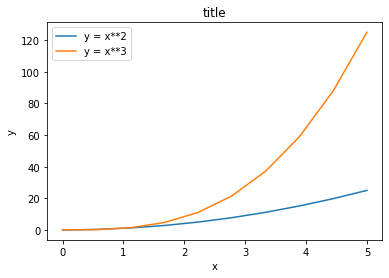

In [29]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');
show()

## Formattage des textes: LaTeX et fontes

Matplotlib offre un excellent support pour LaTeX. Tout ce que nous devons faire est d'utiliser les signes dollar pour encapsuler LaTeX dans n'importe quel texte (légende, titre, étiquette, etc.). Par exemple, `"$y=x^3$"`.

Il faut bien-sûr avoir aussi LaTex d'installé sur votre machine.

La figure ci-dessus est fonctionnelle, mais elle ne répond pas (encore) aux critères d'une figure utilisée dans une publication. Avant tout, nous devons disposer d'un texte formaté au format LaTeX, et ensuite, nous devons pouvoir ajuster la taille de la police pour qu'elle apparaisse correctement dans une publication.

Mais ici, nous pouvons rencontrer un problème légèrement subtil avec le code LaTeX et les chaînes de texte Python. Dans LaTeX, nous utilisons fréquemment la barre oblique inverse dans les commandes, par exemple `\alpha` pour produire le symbole $\alpha$. Mais la barre oblique inverse a déjà une signification dans les chaînes Python (le caractère de code d'échappement). Pour éviter que Python ne perturbe notre code latex, nous devons utiliser des chaînes de texte "brutes". Les chaînes de texte brutes sont précédées d'un "r", comme `r"\alpha"` ou `r'\alpha'` au lieu de `"\alpha"` ou `'\alpha'` :

Matplotlib est très favorable à LaTeX. Il suffit d'utiliser les signes de dollar pour encapsuler LaTeX dans n'importe quel texte (légende, titre, étiquette, etc.). Par exemple, `"$y=x^3$"`.

Mais ici, nous pouvons nous heurter à un problème légèrement subtil avec le code LaTeX et les chaînes de texte Python. En LaTeX, nous utilisons fréquemment la barre oblique inverse dans les commandes, par exemple `\alpha` pour produire le symbole $\alpha$. Mais la barre oblique inverse a déjà une signification dans les chaînes de caractères Python (le caractère de code d'échappement). Pour éviter que Python ne gâche notre code latex, nous devons utiliser des chaînes de texte "brutes". Les chaînes de texte brutes sont précédées d'un '`r`', comme `r"\alpha"` ou `r'\alpha'` au lieu de `"\alpha"` ou `'\alpha'` :

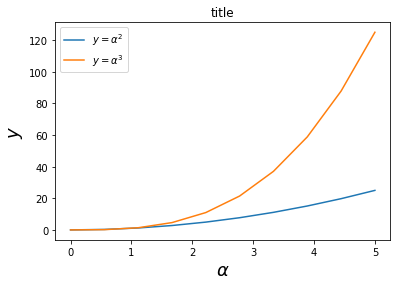

In [30]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');
show()

Nous pouvons également modifier la taille globale et la famille des polices, qui s'appliquent à tous les éléments de texte d'une figure (étiquettes à cocher, étiquettes et titres des axes, légendes, etc :)

In [31]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

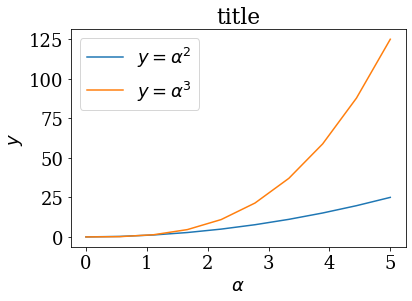

In [32]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');
show()

Un bon choix de polices globales sont les polices STIX : 

In [33]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

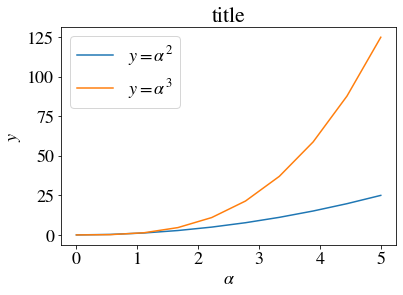

In [34]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');
show()

Ou, alternativement, nous pouvons demander que matplotlib utilise LaTeX pour faire le rendu des éléments de texte dans la figure :

In [35]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

In [36]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');
show()

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/mds/.cache/matplotlib/tex.cache/e9795b7abf817a4bf6eb05edd5e405d0.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.5 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on e9795b7abf817a4bf6eb05edd5e405d0.log.




<Figure size 432x288 with 1 Axes>

In [38]:
# restore
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

## Couleurs, largeur et types de lignes

### Couleurs

Avec matplotlib, nous pouvons définir les couleurs des lignes et autres éléments graphiques de plusieurs façons. Tout d'abord, nous pouvons utiliser la syntaxe de type MATLAB où `'b'` signifie bleu, `'g'` signifie vert, etc. L'API MATLAB pour la sélection des styles de lignes est également prise en charge : par exemple, `'b.-'` signifie une ligne bleue avec des points :

In [39]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

Pous pouvons également définir les couleurs par leur nom ou par des codes hexadécimaux RGB et éventuellement fournir une valeur alpha en utilisant les arguments des mots-clés `color` et `alpha` :

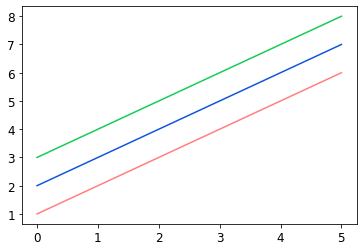

In [40]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color
show()

### Styles de lignes et de marqueurs

Pour modifier la largeur de la ligne, nous pouvons utiliser l'argument `linewidth` ou `lw` comme mot-clé. Le style de ligne peut être sélectionné à l'aide des arguments de mot-clé `linestyle` ou `ls` :

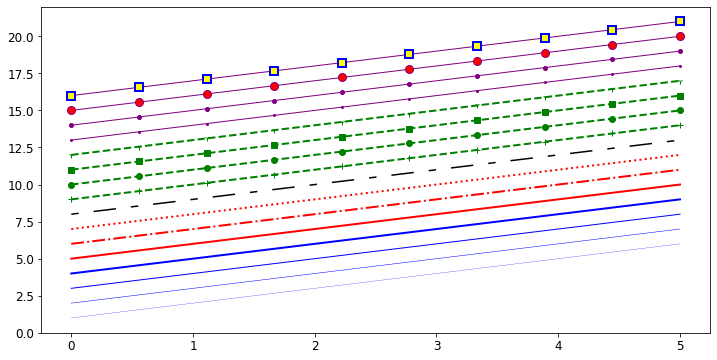

In [41]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");
show()

## Contrôle des axes

L'aspect des axes est un aspect important d'une figure que nous devons souvent modifier pour obtenir un graphisme de qualité pour une publication. Nous devons pouvoir contrôler l'emplacement des cales et des étiquettes, modifier la taille de la police et éventuellement les étiquettes utilisées sur les axes. Dans cette section, nous allons examiner le contrôle de ces propriétés dans une figure matplotlib.

### Plot range

La première chose que nous pourrions vouloir configurer est la portée des axes. Nous pouvons le faire en utilisant les méthodes `set_ylim` et `set_xlim` dans l'objet axe, ou `axis('tight')` pour obtenir automatiquement des plages d'axes "tightly fitted" :

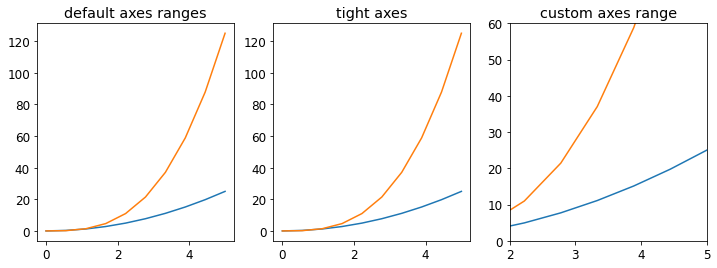

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");
show()

### Échelle logarithmique

Il est également possible de définir une échelle logarithmique pour l'un ou les deux axes. Cette fonctionnalité n'est en fait qu'une application d'un système de transformation plus général dans Matplotlib. Les échelles de chacun des axes sont définies séparément en utilisant les méthodes `set_xscale` et `set_yscale` qui acceptent un paramètre (avec la valeur "log" dans ce cas) :

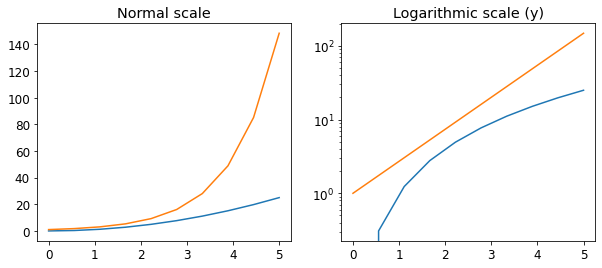

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");
show()

## Placement des échelles et libellés

Nous pouvons déterminer explicitement l'endroit où nous voulons placer les cotes de l'axe avec les fonctions `set_xticks` et `set_yticks`, qui prennent toutes deux une liste de valeurs pour l'endroit où les cotes doivent être placées sur l'axe. Nous pouvons également utiliser les méthodes `set_xticklabels` et `set_yticklabels` pour fournir une liste d'étiquettes de texte personnalisées pour chaque emplacement de tique :

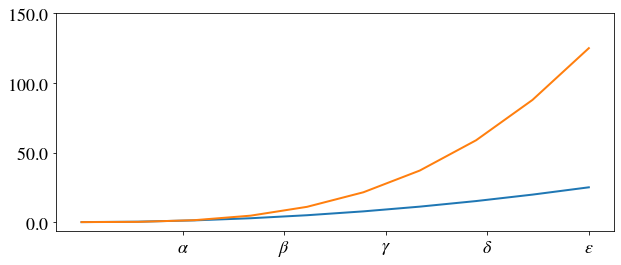

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels
show()

Il existe un certain nombre de méthodes plus avancées pour contrôler le placement des tiques majeures et mineures dans les figures du matplotlib, comme le placement automatique selon différentes politiques. Voir http://matplotlib.org/api/ticker_api.html pour plus de détails.

### Notation scientifique

Avec de grands nombres sur les axes, il est souvent préférable d'utiliser la notation scientifique :

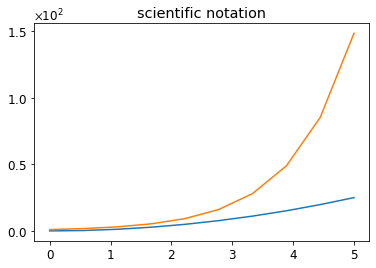

In [45]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
show()

## Formattage des espaces sur les axes

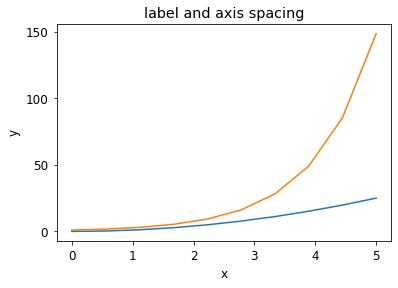

In [46]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");
show()

In [ ]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

### Ajustements de la position des axes

Malheureusement, lors de la sauvegarde des chiffres, les étiquettes sont parfois coupées, et il peut être nécessaire d'ajuster un peu la position des axes. Ceci peut être fait en utilisant `subplots_adjust` :

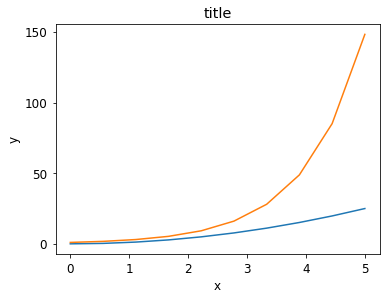

In [47]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);
show()

## Grille

Avec la méthode `grid` dans l'objet axis, nous pouvons activer et désactiver les lignes de la grille. Nous pouvons également personnaliser l'apparence des lignes de la grille en utilisant les mêmes arguments de mots-clés que la fonction `plot` :

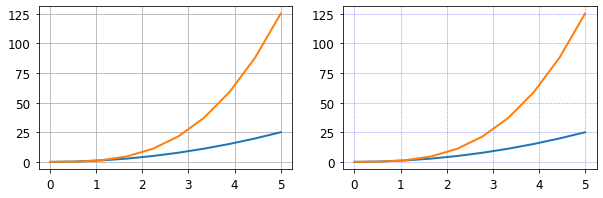

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
show()

## Double graphique

Il est parfois utile d'avoir deux axes x ou y dans une figure ; par exemple, lorsque l'on trace des courbes avec différentes unités ensemble. Matplotlib supporte cela avec les fonctions `twinx` et `twiny` :

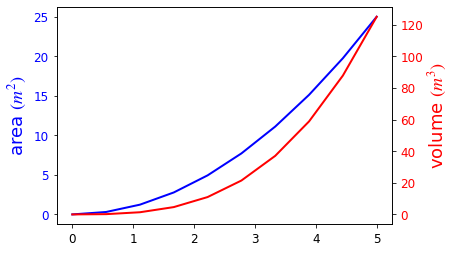

In [49]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
show()

## Axes centrés

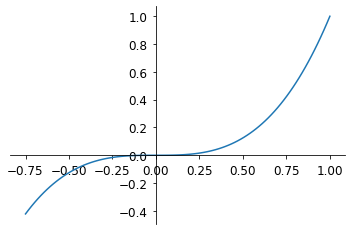

In [50]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);
show()

## Autres graphes 2D

En plus de la méthode normale de `plot`, il existe un certain nombre d'autres fonctions permettant de générer différents types de tracés. Voir la galerie de parcelles de matplotlib pour une liste complète des types de parcelles disponibles : http://matplotlib.org/gallery.html. Quelques-uns des plus utiles sont présentés ci-dessous :

In [51]:
n = np.array([0,1,2,3,4,5])

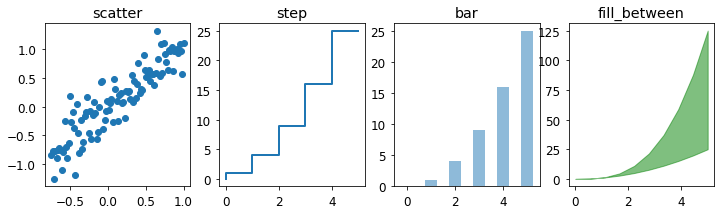

In [52]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");
show()

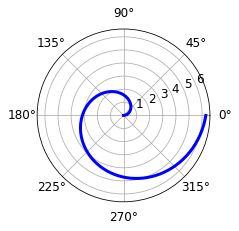

In [53]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);
show()

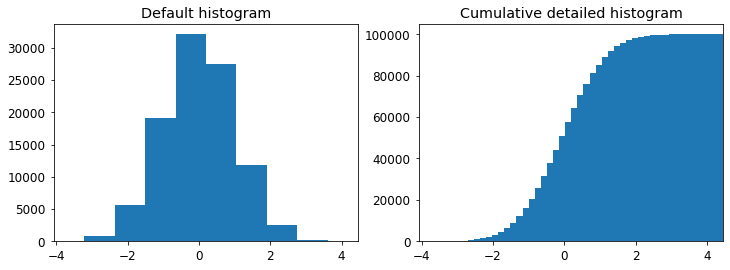

In [55]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));
show()

## Textes d'annotation

L'annotation du texte dans les figures de matplotlib peut être faite en utilisant la fonction "texte". Elle prend en charge le formatage LaTeX tout comme les textes et les titres des étiquettes d'axe :

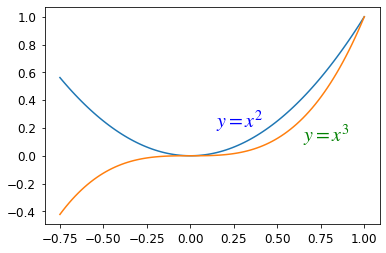

In [56]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");
show()

## Figures avec sous graphes

Les axes peuvent être ajoutés à un canevas de figure de matplotlib manuellement en utilisant `fig.add_axes` ou en utilisant un gestionnaire de disposition de sous-figure tel que `subplots`, `subplot2grid`, ou `gridspec` :

### subplots

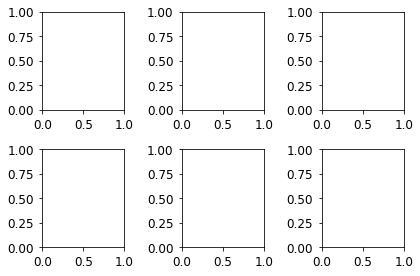

In [57]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()
show()

### subplot2grid

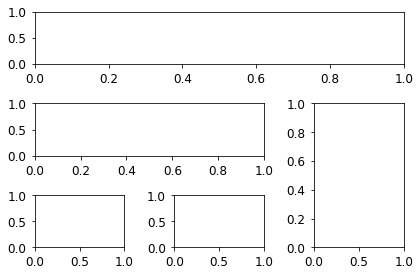

In [58]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()
show()

### gridspec

In [60]:
import matplotlib.gridspec as gridspec

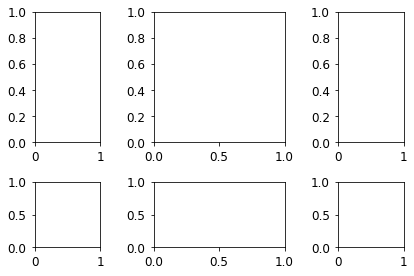

In [61]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()
show()

### add_axes

L'ajout manuel d'axes avec `add_axes` est utile pour ajouter des insets aux chiffres :

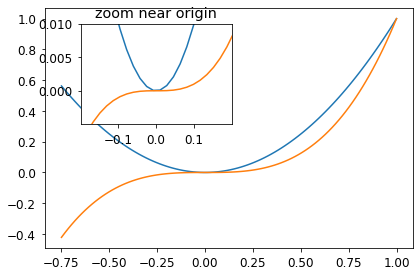

In [62]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);
show()

## Graphes de contour

Les "colormaps" et les courbes de contour sont utiles pour tracer les fonctions de deux variables. Dans la plupart de ces fonctions, nous utiliserons une carte de couleurs pour coder une dimension des données. Il existe un certain nombre de cartes de couleurs prédéfinies. Il est relativement simple de définir des cartes de couleurs personnalisées. Pour une liste des cartes de couleurs prédéfinies voir : http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [63]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [65]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

### pcolor

/tmp/ipykernel_534858/991876967.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())


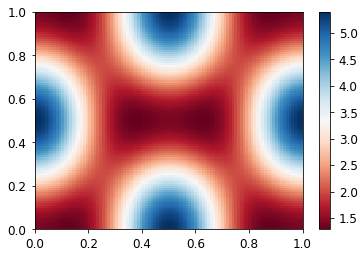

In [66]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
show()

### imshow

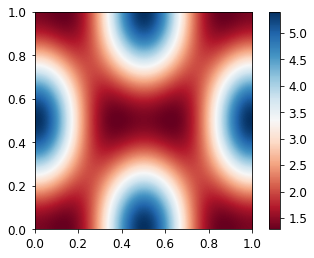

In [67]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)
show()

### contour

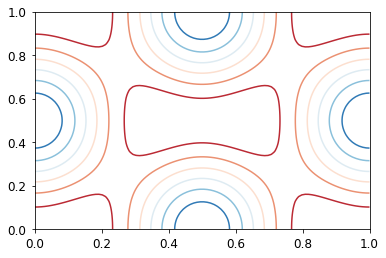

In [68]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
show()

# graphes 3D 

Pour utiliser des graphiques 3D dans matplotlib, nous devons d'abord créer une instance de la classe `Axes3D`. Les axes 3D peuvent être ajoutés à un canevas de figures de matplotlib exactement de la même manière que les axes 2D ; ou, plus pratique, en passant un argument de type `projection='3d'` aux méthodes `add_axes` ou `add_subplot`.

In [69]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

## Tracés de surface

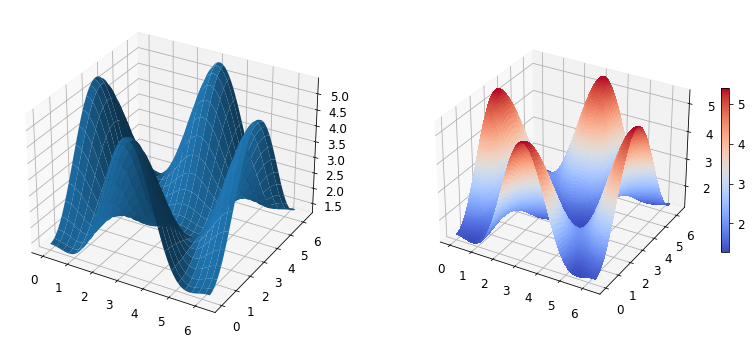

In [70]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
show()

### Tracé en fil de fer

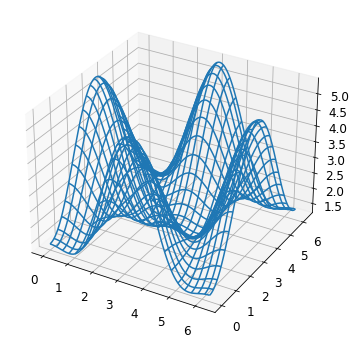

In [71]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
show()

## Graphiques de coutour avec projections

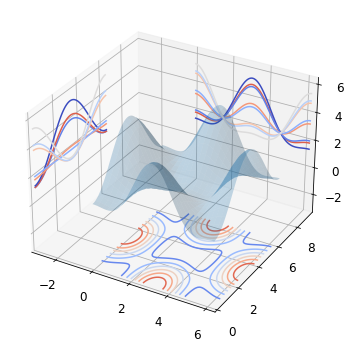

In [73]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);
show()

### Changer l'angle de vue

Nous pouvons changer la perspective d'un graphe en 3D en utilisant la méthode `view_init`, qui prend deux arguments : l'angle d'élévation `elevation` et l'angle d'azimut `azimuth` (en degrés) :

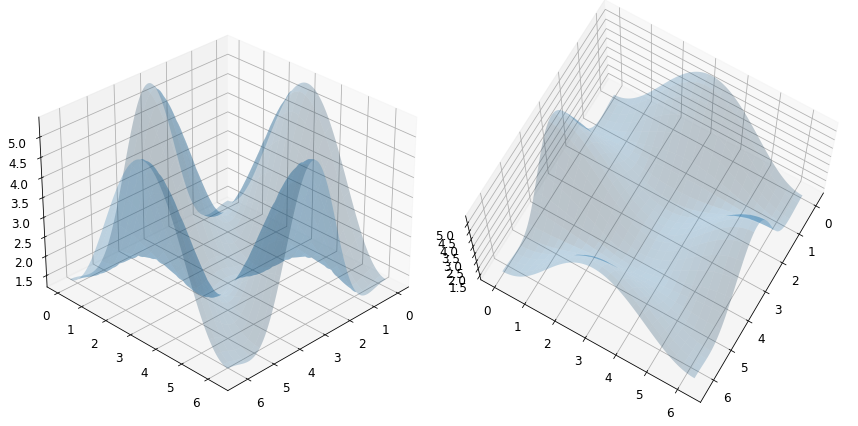

In [74]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()
show()

# Visualisation de données géographiques

[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) est un paquet Python open source conçu pour faciliter au maximum le dessin de cartes pour l'analyse et la visualisation de données.

`Cartopy` utilise les puissantes bibliothèques `PROJ.4`, `numpy` et `shapely` et dispose d'une interface de dessin simple et intuitive vers `matplotlib` pour créer des cartes de qualité publication.

Voici quelques-unes des principales caractéristiques de `cartopy` :

- définitions de la projection orientée objet
- les transformations de points, de lignes, de vecteurs, de polygones et d'images entre les projections
- intégration pour exposer la cartographie avancée dans `matplotlib` avec une interface simple et intuitive
- traitement puissant des données vectorielles en intégrant la lecture des fichiers de forme basés sur `Shapely`

Importation de la librairie : 

In [75]:
# import matplotlib
import matplotlib.pyplot as plt

# conda install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Différents exemples de visualisation

La principale classe pour l'intégration de la cartographie dans `matplotlib` est celle des `GeoAxes`, qui est une sous-classe de la classe `Axes` de `matplotlib`. La classe `GeoAxes` ajoute une fonctionnalité supplémentaire à un axe spécifique au dessin de cartes. La majorité des méthodes qui ont été spécialisées à partir des axes originaux sont là pour ajouter un comportement amélioré - attendu -, mais certaines sont là pour contourner les limitations que les axes standard de matplotlib, qui traitent les données de manière cartésienne (la plupart d'entre elles ont été ou devraient être intégrées au projet matplotlib).

`Cartopy` propose une interface permettant de créer facilement des cartes à l'aide de `matplotlib`. Pour créer une carte de base, il suffit de dire à `matplotlib` d'utiliser une projection cartographique spécifique, puis d'ajouter quelques frontières côtières aux axes :

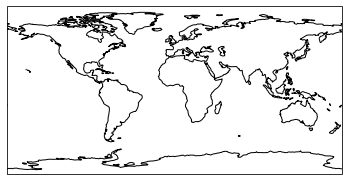

In [76]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

Une liste des projections disponibles à utiliser avec matplotlib se trouve sur la page Liste des projections de Cartopy.

La ligne `plt.axes(projection=ccrs.PlateCarree())` met en place une instance GeoAxes qui expose une variété d'autres méthodes liées à la carte. Dans le cas de l'exemple précédent, nous avons utilisé la méthode `coastlines()` pour ajouter des lignes de côte à la carte.

Créons une autre carte dans une projection différente, et utilisons la méthode `stock_img()` pour ajouter une image sous-jacente à la carte :

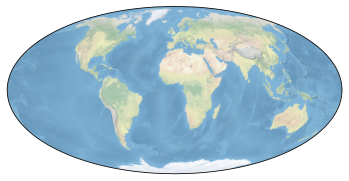

In [77]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

À ce stade, vous pouvez essayez de choisir votre propre projection et de créer une carte avec une image en sous-couche et des côtes au-dessus.

## Ajouter des données à la carte

Une fois que vous avez la carte exactement comme vous le souhaitez, des données peuvent y être ajoutées exactement de la même manière qu'avec les axes matplotlib normaux. Par défaut, le système de coordonnées de toute donnée ajoutée à un Géoaxe est le même que le système de coordonnées du Géoaxe lui-même. Pour contrôler dans quel système de coordonnées se trouvent les données fournies se trouvent, vous pouvez ajouter le mot-clé transform avec une instance `cartopy.crs.CRS` appropriée :

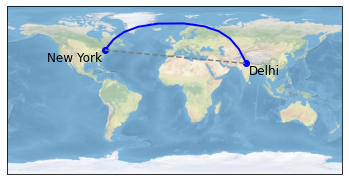

In [79]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

Remarquez que la ligne en bleu entre New York et Delhi n'est pas droite sur une carte plate de type `PlateCarree`, cela est dû au fait que le système de coordonnées géodésiques est un système de coordonnées véritablement sphérique, où une ligne entre deux points est définie comme le chemin le plus court entre ces points sur le globe plutôt que dans l'espace cartésien 2d.

Reprennons cette trajectoire et illustrons l'utilisation de la projection [`Orthographic`](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#cartopy.crs.Orthographic) : 

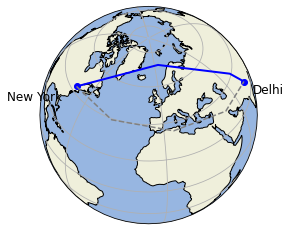

In [80]:
import cartopy

ax = plt.axes(projection=ccrs.Orthographic(-10, 45))

ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

ax.set_global()
ax.gridlines()

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )
plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())


plt.show()   

## Cartographie plus avancée avec cartopy et matplotlib

Dès le départ, l'objectif de `cartopy` a été de simplifier et d'améliorer la qualité des visualisations cartographiques disponibles pour les données scientifiques. Grâce à la simplicité de l'interface de la cartographie, dans de nombreux cas, le plus difficile pour produire de telles visualisations est de récupérer les données en premier lieu. Pour y remédier, un paquet Python, `Iris`, a été créé pour faciliter le chargement et la sauvegarde des données provenant de divers ensembles de données maillées. Certains des exemples suivants utilisent les capacités de chargement d'`Iris`, tandis que d'autres utilisent le paquet Python `netCDF4` afin de montrer une série d'approches différentes pour le chargement des données. Vous aurez le choix de choisir les plus adaptés à vos besoins.

**netCDF4** :

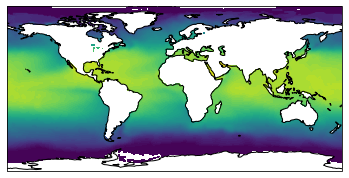

In [81]:
import os
from netCDF4 import Dataset as netcdf_dataset
import numpy as np
from cartopy import config


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )

dataset = netcdf_dataset(fname)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

**IRIS** :

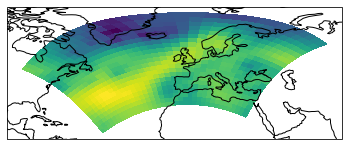

In [82]:
import iris

# load some sample iris data
fname = iris.sample_data_path('rotated_pole.nc')
temperature = iris.load_cube(fname)

# iris comes complete with a method to put bounds on a simple point
# coordinate. This is very useful...
temperature.coord('grid_latitude').guess_bounds()
temperature.coord('grid_longitude').guess_bounds()

# turn the iris Cube data structure into numpy arrays
gridlons = temperature.coord('grid_longitude').contiguous_bounds()
gridlats = temperature.coord('grid_latitude').contiguous_bounds()
temperature = temperature.data

# set up a map
ax = plt.axes(projection=ccrs.PlateCarree())

# define the coordinate system that the grid lons and grid lats are on
rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
plt.pcolormesh(gridlons, gridlats, temperature, transform=rotated_pole)

ax.coastlines()

plt.show()

`cartopy` est dotée d'une puissante fonctionnalité de traçage de champs vectoriels. Il existe 3 options distinctes pour
la visualisation des champs vectoriels : <a class="reference internal" href="geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.quiver" title="cartopy.mpl.geoaxes.GeoAxes.quiver"><code class="xref py py-meth docutils literal"><span class="pre">quivers</span></code></a> (<a class="reference internal" href="../examples/arrows.html#examples-arrows"><span class="std std-ref">exemple</span></a>),
<a class="reference internal" href="geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.barbs" title="cartopy.mpl.geoaxes.GeoAxes.barbs"><code class="xref py py-meth docutils literal"><span class="pre">barbs</span></code></a> (<a class="reference internal" href="../examples/barbs.html#examples-barbs"><span class="std std-ref">exemple</span></a>) and
<a class="reference internal" href="geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.streamplot" title="cartopy.mpl.geoaxes.GeoAxes.streamplot"><code class="xref py py-meth docutils literal"><span class="pre">streamplots</span></code></a> (<a class="reference internal" href="../examples/streamplot.html#examples-streamplot"><span class="std std-ref">exemple</span></a>)
chacun ayant ses propres avantages pour l'affichage de certaines formes de champs vectoriels.

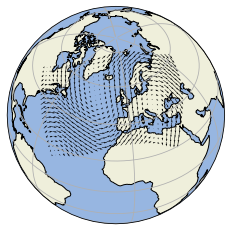

In [83]:
import cartopy

def sample_data(shape=(20, 30)):
    """
    Returns ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned crs will be a rotated
    pole CRS, meaning that the vectors will be unevenly spaced in
    regular PlateCarree space.

    """
    crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

    x = np.linspace(311.9, 391.1, shape[1])
    y = np.linspace(-23.6, 24.8, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
    v = 20 * np.cos(6 * np.deg2rad(x2d))

    return x, y, u, v, crs


def main():
    ax = plt.axes(projection=ccrs.Orthographic(-10, 45))

    ax.add_feature(cartopy.feature.OCEAN, zorder=0)
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

    ax.set_global()
    ax.gridlines()

    x, y, u, v, vector_crs = sample_data()
    ax.quiver(x, y, u, v, transform=vector_crs)

    plt.show()


if __name__ == '__main__':
    main()
    


## Visualisation d'une trajectoire d'avion

Nous allons tracer une trajectoire réelle d'une avion qui a atteri à l'aéroport CDG. Pour cela nous proposons de charger la trajectoire sauvegardée dans le fichier `TrajectoireAvion.csv`, fichier qui accompagne ce noteebook. Nous vous laissons le soin de regarder comment est structuré ce fichier. Ca taille est réduite volontairement et ne conserve que la partie descente. Pour plus de détail sur Pandas et le chargement des fichiers csv nous vous renvoyons à l'atelier `Atelier-Pandas.ipnyb`.

Lecture de la trajectoire dans un `DataFrame` : 

In [84]:
import pandas as pd

# Lecture de la trajectoire
# Attention : on inverse lat/long pour "coller" à l'ordre des coordonnnées du repère cartésien
df = pd.read_csv('TrajectoireAvion.csv', sep=',', index_col=0, names=['index','long','lat'])

In [85]:
df.head()

,long,lat
index,,
0,3.655165,49.703977
1,3.654670,49.697228
2,3.654118,49.689700
3,3.653185,49.682445
4,3.652652,49.675176


Plot "minimal" :

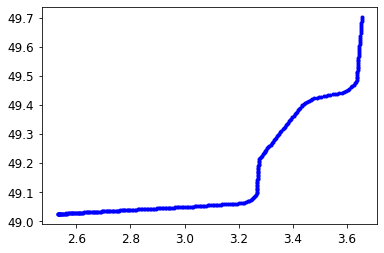

In [86]:
plt.plot(df['long'][0:], df['lat'][0:],
         color='blue', linewidth=1, marker='.')

plt.show()

Affichage de la trajectoire avec le nom de l'aéroport : 

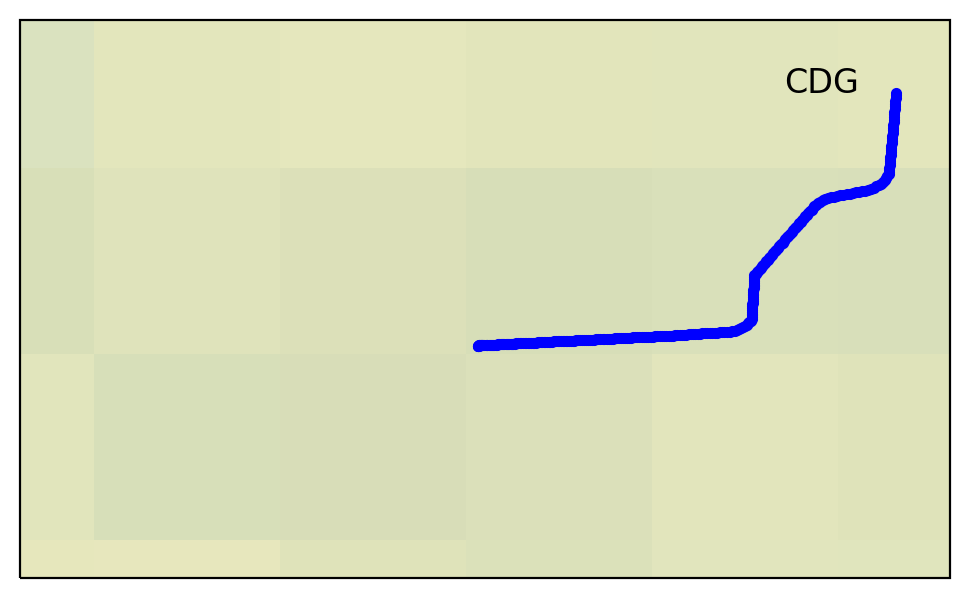

In [87]:
plt.figure(dpi=200)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.plot(df['long'][0:], df['lat'][0:],
         color='blue', linewidth=1, marker='.',
         transform=ccrs.PlateCarree(),
         )

plt.text(df['long'][0] - 0.1 , df['lat'][0] , 'CDG',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

ax.set_extent([1.3,3.8,48.4,49.9],crs=ccrs.PlateCarree())

plt.show()

Autre exemple d'affichage. Ici nous profitons des fonctionnalités de l'interface pour ajouter des `features` *OCEAN, LAND, RIVERS* et *COASTLINE* proposées par `cartopy` :

In [ ]:
plt.figure(dpi=200)
ax = plt.subplot(1,1,1,projection=ccrs.Mercator())
ax.set_xlabel('Longitude (°)')
ax.set_ylabel("Latitude (°)")
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m')) 

ax.plot(df['long'][0:], df['lat'][0:],color='blue', linewidth=1, transform=ccrs.PlateCarree(),)
ax.set_extent([1.3,3.8,48.4,49.9],crs=ccrs.PlateCarree())

plt.show()

Par défaut, `matplotlib` fixe automatiquement les limites de vos `Axes` en fonction des données que vous tracez. Comme la cartographie met en œuvre une classe `GeoAxes`, cela équivaut aux limites de la carte résultante. Parfois, cette mise à l'échelle automatique est souhaitable et parfois non.

Pour définir l'étendue d'un `GeoAxes` de cartographie, il existe plusieurs options pratiques :

- Pour les tracés "globaux", utilisez la méthode [`set_global()`](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_global).
- Pour définir l'étendue de la carte sur la base d'un rectangle délimité, dans n'importe quel système de coordonnées, utilisez la méthode [`set_extent()`](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent).
- Sinon, les méthodes standard de définition des limites peuvent être utilisées dans le système de coordonnées natif des GeoAxes (par exemple [`set_xlim()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html#matplotlib.axes.Axes.set_xlim) et [`set_ylim()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylim.html#matplotlib.axes.Axes.set_ylim)).



Pour finir, nous allons améliorer le rendu de nos graphiques en utilisant la bibliothèse [`traffic – Air traffic data processing in Python`](https://traffic-viz.github.io/index.html#) spécifique aux objets du domaine de l'aviation civile. Elle est en court de développement mais offre de fonctionnalités intéressantes. 
Pour commencer nous devons installer et importer la librairie `traffic`.

In [ ]:
from traffic.data import airports

Exemple de recherche d'un aéroport à partir de son code et affichage de son empreinte au sol :

In [ ]:
from traffic.data import airports
airports['EHAM'].name

In [ ]:
airports['EHAM']

In [ ]:
from traffic.data import airports
from traffic.data.samples import belevingsvlucht
belevingsvlucht

In [ ]:
(
    airports["EHAM"].geoencode(runways=True, labels=True)
    + belevingsvlucht.first(minutes=1).geoencode().mark_line(color="steelblue")
    + belevingsvlucht.last(minutes=6).geoencode().mark_line(color="orangered")
).configure_text(font="Ubuntu", fontWeight="bold")

Reprennons ce même aéroport et affichons plus de détails sur ses pistes : 

In [ ]:
airports.search('Paris')

In [ ]:
airports['LFPO'].name

In [ ]:
airports['LFPG'].name

In [ ]:
airports['LFPB'].name

Affichez l'empriente au sol de LFPB, en faisant le même appel précédent en retirant le `.name`

Reprennons notre trajectoire. Nous allons rajouter les trois aéroports : LFPG, LFPO et LFPB.


In [ ]:
plt.figure(dpi=200)
ax = plt.subplot(1,1,1,projection=ccrs.Mercator())
ax.set_xlabel('Longitude (°)')
ax.set_ylabel("Latitude (°)")
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.RIVERS.with_scale('50m'))
ax.add_feature(cfeature.COASTLINE.with_scale('50m')) 

airports['LFPG'].plot(ax,runways=dict(linewidth=1,color="black"))
airports['LFPO'].plot(ax,runways=dict(linewidth=1,color="black"))
airports['LFPB'].plot(ax,runways=dict(linewidth=1,color="black")) 

ax.plot(df['long'][0:], df['lat'][0:],color='blue', linewidth=1, transform=ccrs.PlateCarree(),)
ax._set_extent([1.3,3.8,48.4,49.9],crs=ccrs.PlateCarree())

plt.show()

# Compléments

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
* https://traffic-viz.github.io/index.html
* https://pypi.org/project/Cartopy/